# Movies Dataset Preprocessing
In this file, we will be going through the steps to ingest and preprocess our movies data. Initially, we have a data of over 7,00,000 movies available on TMDB, which can be found [here](https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies).

We aim to reduce this data and make it as relevant as possible for our analysis. By the end of this, we expect to have a data of movies with all the necessary cleaned tags, which can be further used to train our model.

## Importing the Dependencies
In this section, we will import the necessary modules required for the pre processing of out dataset

In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import json, requests
import time
from tmdbv3api import TMDb, Movie 

## Loading the Dataset and Preprocessing
Here, we will load our dataset and get a first glance at it. Also, we will do some preprocessing to fetch data as per our condition and clean it accoringly.

In [6]:
data = pd.read_csv('/Users/dhruv/Desktop/Machine_Learning/Projects/Movie_Recommender/Data/TMDB_Movies_Dataset/movies.csv')

### Release Date Allocation
The primary factor here will be the date, so let us go ahead and convert it to the date time format.

In [7]:
data['release_date'] = pd.to_datetime(data['release_date']) #Converts the string into date time format
data['release_date'] = data['release_date'].dt.year #Gets the year of the converted format
data = data.rename(columns={'release_date':'release_year'})


In [8]:
data=data.dropna(subset=['release_year'])

Let us convert those year values to integers, for easy manupilation later on.

In [9]:
# Let us now convert release year to an integer type
data['release_year'] = data['release_year'].astype(int)

### Genres and Language


As far as genres is concerned, we would like to include all of them apart from Documentary. So let us go ahead and pre process our data according to that.

#### Genres

In [10]:
data=data.dropna(subset=['genres']) #Drop all the entries where there is NaN for genres

In [11]:
data =data[data['genres']!= "Documentary"]  # Display all genres apart from documentary

### Genres Column Modification
Here, the genres are stored as strings seperated by "-". I would replace them with a blank space. Also, let us shorten Science Fiction to Sci-Fi.

In [12]:
data['genres'] = data['genres'].str.replace("-"," ")
data['genres'] = data['genres'].str.replace("Science Fiction","Sci-Fi")

### KeyWords Column Modification
Let us also try to see how we can modify and store key words in our dataframe. Here also, our keywords are stored by "-" seperated values. Let us try to store all the keywords in a list, where each element is one keyword.

Now, there are empty valeus as well, we need to see how these null values are to be dealt with. We can use the string 'Unknown' to append at this point of time.

In [13]:
data['keywords'] = data['keywords'].fillna(value='Unknown')

In [14]:
data['keys']=data['keywords'].str.split("-")

### Credits Column Modification
Let us also try to see how we can modify and store credits in our dataframe. Here also, our keywords are stored by "-" seperated values. Let us try to store all the top 5 cast memebers in seperate columns.

In [15]:
# Split the strings based on '-' and then expand them into separate columns
expanded_columns = data['credits'].str.split('-', expand=True)
expanded_columns = expanded_columns.iloc[:, :5]


# Merge with original dataframe
data = pd.concat([data, expanded_columns], axis=1)

In [16]:
# Rename the columns with the respecitive name

data = data.rename(columns = {0:'Actor_1',1:'Actor_2',2:'Actor_3',3:'Actor_4',4:'Actor_5'})

### Release Status
We should ideally only take movies which have released till date.

In [17]:
data.status.value_counts()

status
Released           405730
In Production         163
Post Production        78
Planned                49
Canceled                5
Rumored                 3
Name: count, dtype: int64

In [18]:
data = data[data['status']=='Released']

In [19]:
data.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_year', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords', 'poster_path', 'backdrop_path', 'recommendations', 'keys',
       'Actor_1', 'Actor_2', 'Actor_3', 'Actor_4', 'Actor_5'],
      dtype='object')

So now, we have all the actor names also stored in our dataset. Let us now go ahead and remove the redundant columns. The columns I will be removing are:

* Overview
* Popularity
* Production_Companies
* Budget
* Revenue
* Status
* Tagline
* Vote_Average
* Vote_Count
* Credits
* Keywords
* Poster_Path
* Backdrop_Path
* Recommendations

In [20]:
data = data.drop(columns=['overview','popularity','production_companies','budget','revenue','status','tagline','vote_average','vote_count','credits','keywords','poster_path','backdrop_path','recommendations'])

In [21]:
data

,id,title,genres,original_language,release_year,runtime,keys,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5
0,615656,Meg 2: The Trench,Action Sci-Fi Horror,en,2023,116.0,"[based on novel or book, sequel, kaiju]",Jason Statham,Wu Jing,Shuya Sophia Cai,Sergio Peris,Mencheta
1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,2023,103.0,"[spain, rome italy, vatican, pope, pig, posses...",Russell Crowe,Daniel Zovatto,Alex Essoe,Franco Nero,Peter DeSouza
2,667538,Transformers: Rise of the Beasts,Action Adventure Sci-Fi,en,2023,127.0,"[peru, alien, end of the world, based on carto...",Anthony Ramos,Dominique Fishback,Luna Lauren Velez,Dean Scott Vazquez,Tobe Nwigwe
3,640146,Ant-Man and the Wasp: Quantumania,Action Adventure Sci-Fi,en,2023,125.0,"[hero, ant, sequel, superhero, based on comic,...",Paul Rudd,Evangeline Lilly,Jonathan Majors,Kathryn Newton,Michelle Pfeiffer
4,677179,Creed III,Drama Action,en,2023,116.0,"[philadelphia pennsylvania, husband wife relat...",Michael B. Jordan,Tessa Thompson,Jonathan Majors,Wood Harris,Phylicia Rashād
...,...,...,...,...,...,...,...,...,...,...,...,...
722701,506520,Zum Freispruch verurteilt,Drama,de,1954,NaN,[Unknown],Richard Lauffen,Joseph Offenbach,Josef Dahmen,Hermann Lenschau,Reinhold Nietschmann
722705,411628,Jugando al esconder,Drama,es,2009,87.0,[Unknown],Zoribel Fonalledas,René Monclova,Jimmy Navarro,Marian Pabón,Norman Santiago
722706,894556,The Midnight Patrol,Drama,en,1918,50.0,[Unknown],Thurston Hall,Rosemary Theby,Goro Kino,Charles K. French,Marjorie Bennett
722709,888716,Assassin Legend,Action,zh,2018,75.0,[Unknown],Tse Miu,William Liao,Yuri Liu,Zhang Chunzhong,Hou Junjie


## EDA

Now that we have our data set pre processed, let us head towards EDA to understand how our data is distributed and gain some valuable insights from it.

Let us see first how our data is distributed according to the release date.

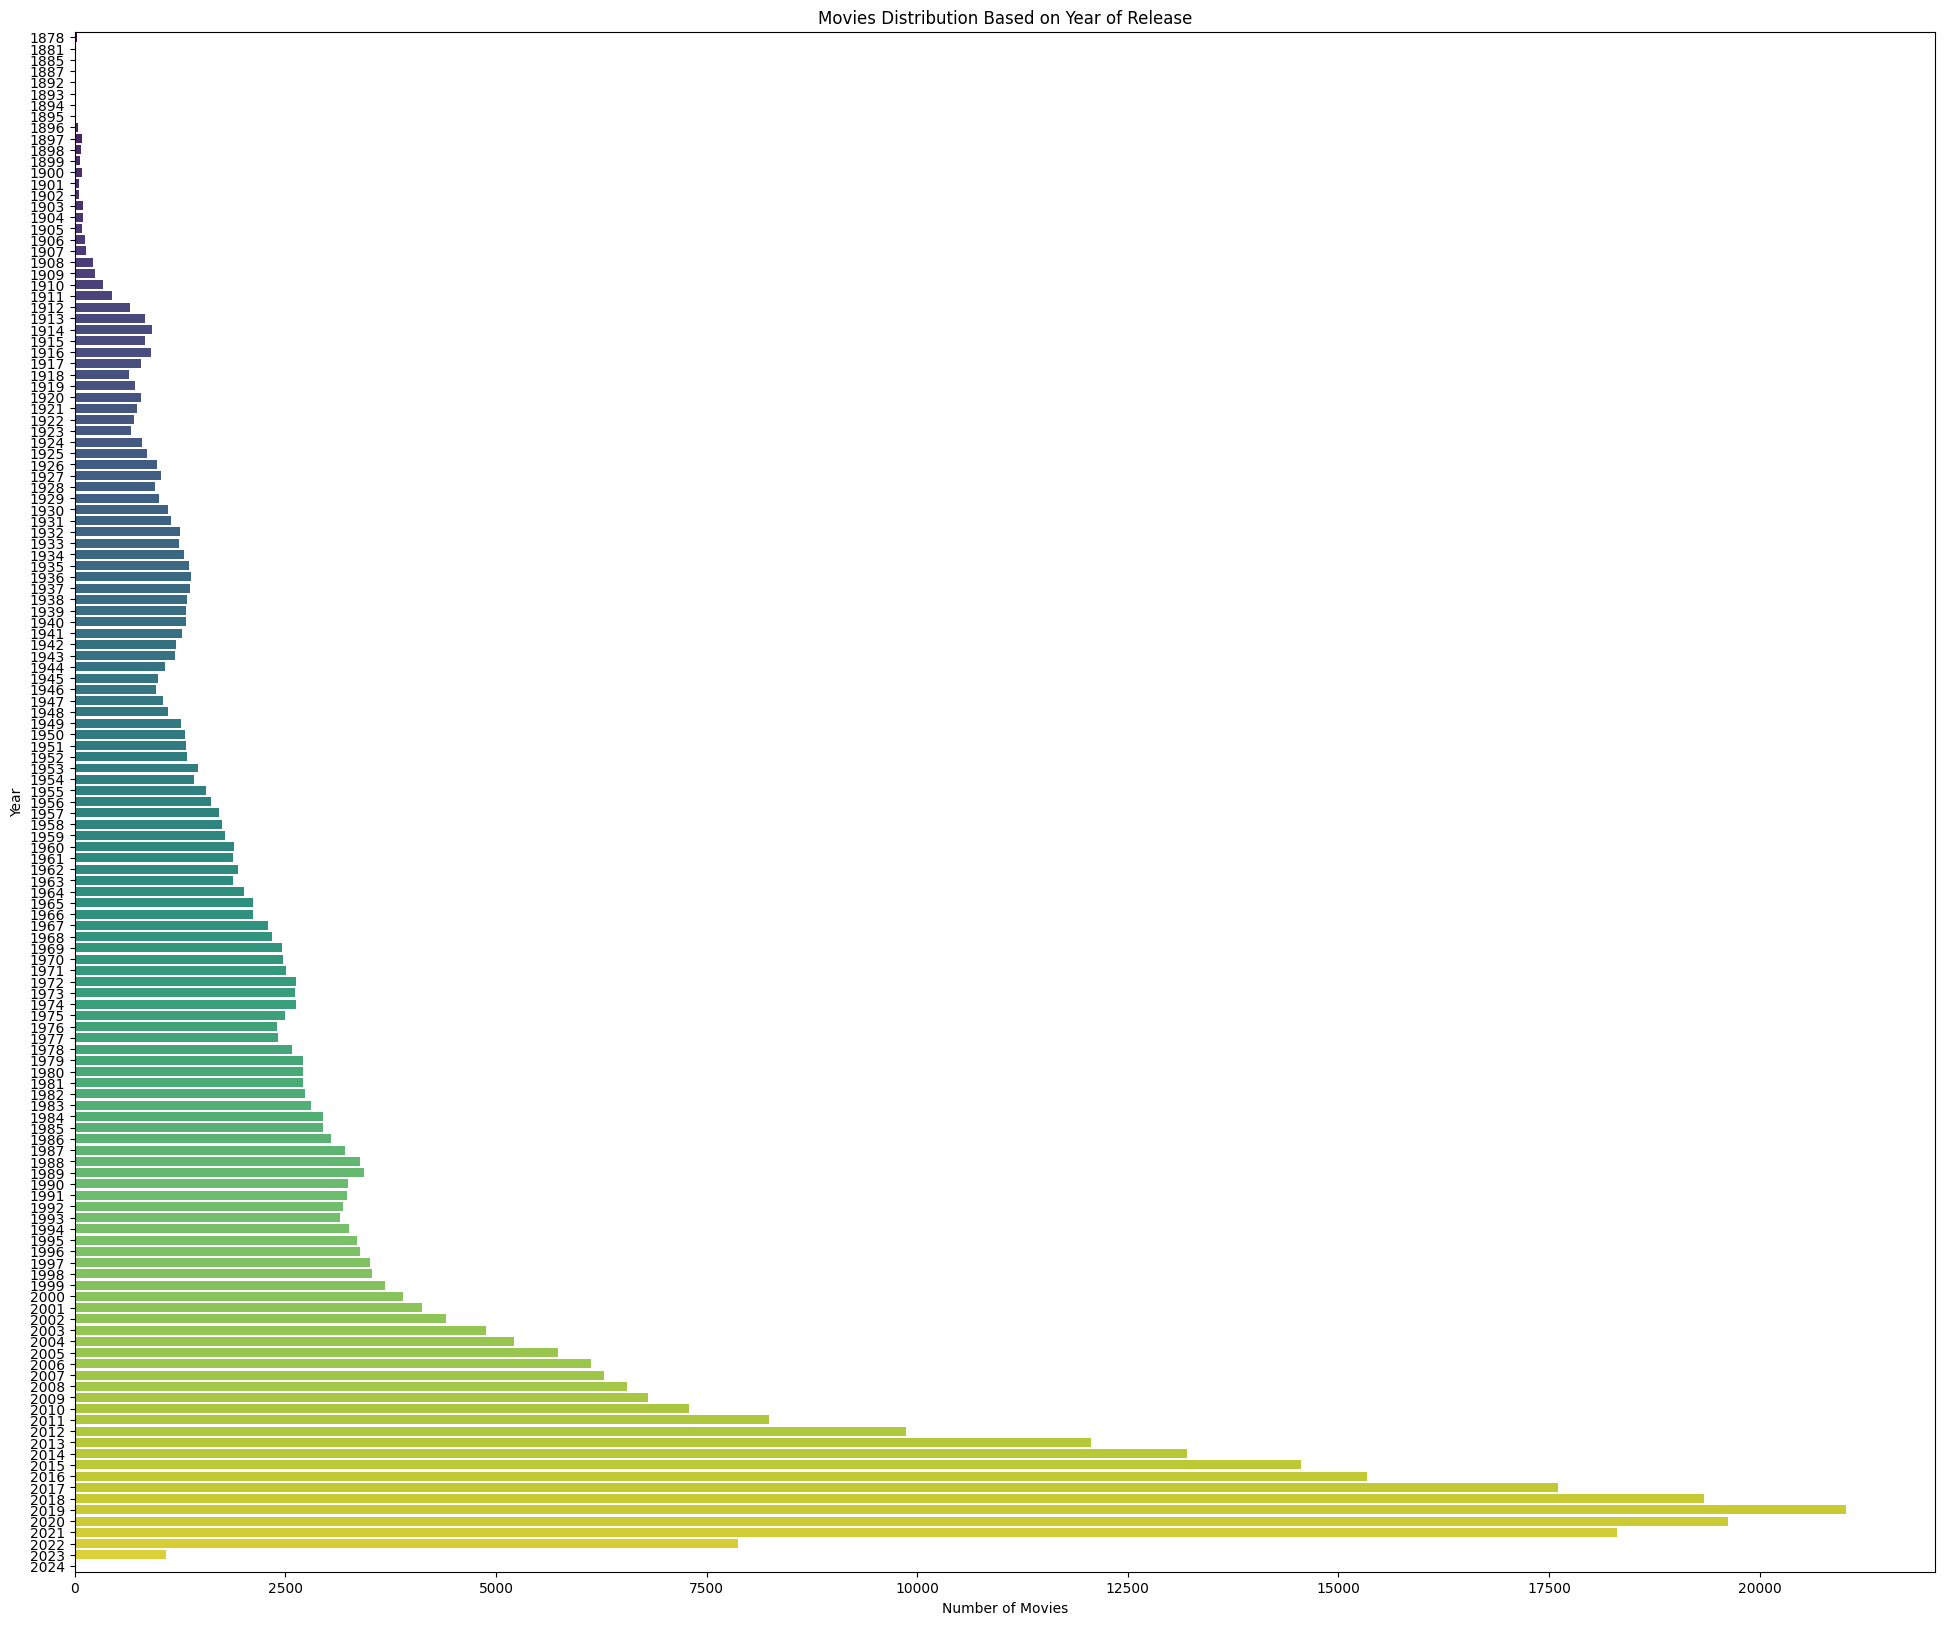

In [22]:
# Release Date Wise
year_counts = data.release_year.value_counts().sort_index()
years = year_counts.index
rel_counts = year_counts.values

plt.figure(figsize=(24, 20))
sns.barplot(x=rel_counts, y=years, orient='h', palette='viridis')
plt.title('Movies Distribution Based on Year of Release')
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.show()

As we can see, themovies are widely distributed across the years. For better understanding, let us just use the movies from 1980 to present.

Let us see first how our data is distributed according to the language.

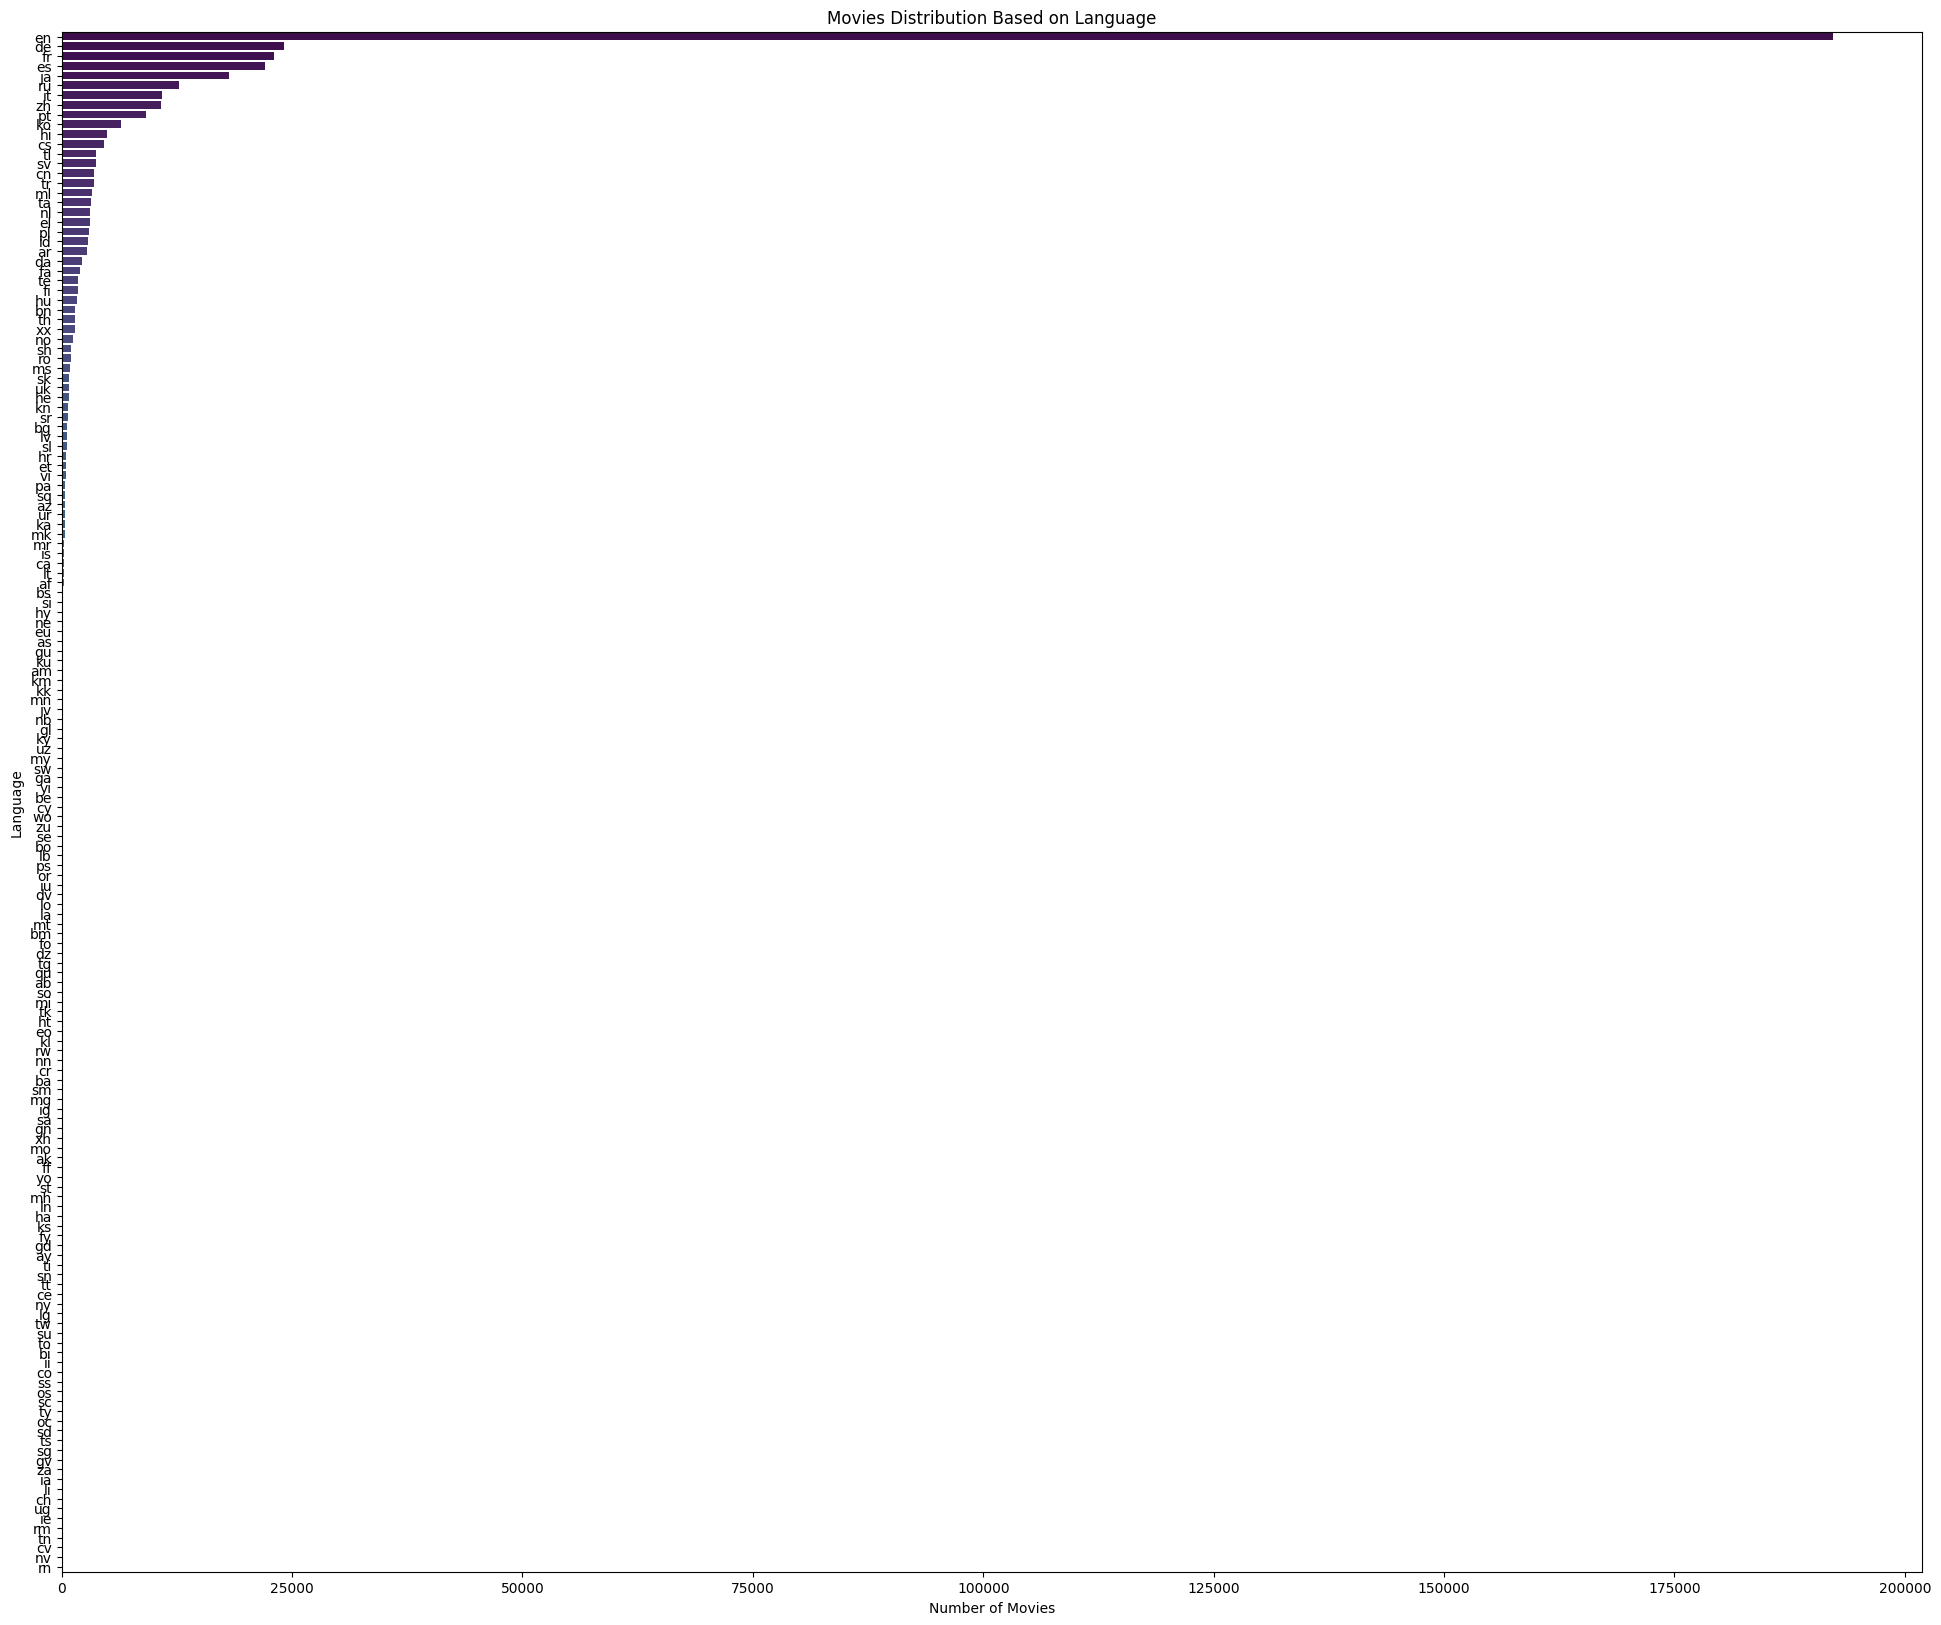

In [23]:
# Language Wise
language_counts = data.original_language.value_counts()
language = language_counts.index
lang_counts = language_counts.values

plt.figure(figsize=(24, 20))
sns.barplot(x=lang_counts, y=language, orient='h', palette='viridis')
plt.title('Movies Distribution Based on Language')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.show()

So here, we can see how most of the movies are in English. Hence it would be better if we could filter out and use all those movies in the **English** language, hence we will modify our database like that.

Also, this is done so to make the data set a bit more short and compact, as we do intent to perform deep learning models. 

### Applying the changes in Language and Year of Release.

In [24]:
# Using movies only in English Language
data = data[data['original_language']=='en']

In [25]:
# Using movies released after 1980
data = data[data['release_year']>=1980]

In [26]:
data

,id,title,genres,original_language,release_year,runtime,keys,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5
0,615656,Meg 2: The Trench,Action Sci-Fi Horror,en,2023,116.0,"[based on novel or book, sequel, kaiju]",Jason Statham,Wu Jing,Shuya Sophia Cai,Sergio Peris,Mencheta
1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,2023,103.0,"[spain, rome italy, vatican, pope, pig, posses...",Russell Crowe,Daniel Zovatto,Alex Essoe,Franco Nero,Peter DeSouza
2,667538,Transformers: Rise of the Beasts,Action Adventure Sci-Fi,en,2023,127.0,"[peru, alien, end of the world, based on carto...",Anthony Ramos,Dominique Fishback,Luna Lauren Velez,Dean Scott Vazquez,Tobe Nwigwe
3,640146,Ant-Man and the Wasp: Quantumania,Action Adventure Sci-Fi,en,2023,125.0,"[hero, ant, sequel, superhero, based on comic,...",Paul Rudd,Evangeline Lilly,Jonathan Majors,Kathryn Newton,Michelle Pfeiffer
4,677179,Creed III,Drama Action,en,2023,116.0,"[philadelphia pennsylvania, husband wife relat...",Michael B. Jordan,Tessa Thompson,Jonathan Majors,Wood Harris,Phylicia Rashād
...,...,...,...,...,...,...,...,...,...,...,...,...
722651,548773,Fern,Comedy Drama,en,2017,5.0,[Unknown],Monica Dolan,Frank Bourke,Helena Jinx Jones,None,None
722655,530362,You Look Good in Blue,Drama,en,2018,15.0,[Unknown],Juan Manuel Salcito,Madeline Weinstein,James Evans,Michael Ariel Orta,None
722664,500328,Revealing Stories,Comedy,en,2011,10.0,[Unknown],Mark Monero,Jason Behan,Cresta Connell,Louie Behan,Tiger Musigapong
722677,431576,Preggo,Comedy,en,2015,8.0,[Unknown],NaN,NaN,NaN,NaN,NaN


### Replacing NaNs of Actor's Column
Now, let us replace the null values of Actor's column with "Unknown" Value

In [27]:
data.isnull().sum()

id                       0
title                    1
genres                   0
original_language        0
release_year             0
runtime               1287
keys                     0
Actor_1              18721
Actor_2              29642
Actor_3              38917
Actor_4              48337
Actor_5              58404
dtype: int64

In [28]:
data

,id,title,genres,original_language,release_year,runtime,keys,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5
0,615656,Meg 2: The Trench,Action Sci-Fi Horror,en,2023,116.0,"[based on novel or book, sequel, kaiju]",Jason Statham,Wu Jing,Shuya Sophia Cai,Sergio Peris,Mencheta
1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,2023,103.0,"[spain, rome italy, vatican, pope, pig, posses...",Russell Crowe,Daniel Zovatto,Alex Essoe,Franco Nero,Peter DeSouza
2,667538,Transformers: Rise of the Beasts,Action Adventure Sci-Fi,en,2023,127.0,"[peru, alien, end of the world, based on carto...",Anthony Ramos,Dominique Fishback,Luna Lauren Velez,Dean Scott Vazquez,Tobe Nwigwe
3,640146,Ant-Man and the Wasp: Quantumania,Action Adventure Sci-Fi,en,2023,125.0,"[hero, ant, sequel, superhero, based on comic,...",Paul Rudd,Evangeline Lilly,Jonathan Majors,Kathryn Newton,Michelle Pfeiffer
4,677179,Creed III,Drama Action,en,2023,116.0,"[philadelphia pennsylvania, husband wife relat...",Michael B. Jordan,Tessa Thompson,Jonathan Majors,Wood Harris,Phylicia Rashād
...,...,...,...,...,...,...,...,...,...,...,...,...
722651,548773,Fern,Comedy Drama,en,2017,5.0,[Unknown],Monica Dolan,Frank Bourke,Helena Jinx Jones,None,None
722655,530362,You Look Good in Blue,Drama,en,2018,15.0,[Unknown],Juan Manuel Salcito,Madeline Weinstein,James Evans,Michael Ariel Orta,None
722664,500328,Revealing Stories,Comedy,en,2011,10.0,[Unknown],Mark Monero,Jason Behan,Cresta Connell,Louie Behan,Tiger Musigapong
722677,431576,Preggo,Comedy,en,2015,8.0,[Unknown],NaN,NaN,NaN,NaN,NaN


In [29]:
data['Actor_1'] = data['Actor_1'].fillna(value="Unknown")
data['Actor_2'] = data['Actor_2'].fillna(value="Unknown")
data['Actor_3'] = data['Actor_3'].fillna(value="Unknown")
data['Actor_4'] = data['Actor_4'].fillna(value="Unknown")
data['Actor_5'] = data['Actor_5'].fillna(value="Unknown")

In [30]:
data

,id,title,genres,original_language,release_year,runtime,keys,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5
0,615656,Meg 2: The Trench,Action Sci-Fi Horror,en,2023,116.0,"[based on novel or book, sequel, kaiju]",Jason Statham,Wu Jing,Shuya Sophia Cai,Sergio Peris,Mencheta
1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,2023,103.0,"[spain, rome italy, vatican, pope, pig, posses...",Russell Crowe,Daniel Zovatto,Alex Essoe,Franco Nero,Peter DeSouza
2,667538,Transformers: Rise of the Beasts,Action Adventure Sci-Fi,en,2023,127.0,"[peru, alien, end of the world, based on carto...",Anthony Ramos,Dominique Fishback,Luna Lauren Velez,Dean Scott Vazquez,Tobe Nwigwe
3,640146,Ant-Man and the Wasp: Quantumania,Action Adventure Sci-Fi,en,2023,125.0,"[hero, ant, sequel, superhero, based on comic,...",Paul Rudd,Evangeline Lilly,Jonathan Majors,Kathryn Newton,Michelle Pfeiffer
4,677179,Creed III,Drama Action,en,2023,116.0,"[philadelphia pennsylvania, husband wife relat...",Michael B. Jordan,Tessa Thompson,Jonathan Majors,Wood Harris,Phylicia Rashād
...,...,...,...,...,...,...,...,...,...,...,...,...
722651,548773,Fern,Comedy Drama,en,2017,5.0,[Unknown],Monica Dolan,Frank Bourke,Helena Jinx Jones,Unknown,Unknown
722655,530362,You Look Good in Blue,Drama,en,2018,15.0,[Unknown],Juan Manuel Salcito,Madeline Weinstein,James Evans,Michael Ariel Orta,Unknown
722664,500328,Revealing Stories,Comedy,en,2011,10.0,[Unknown],Mark Monero,Jason Behan,Cresta Connell,Louie Behan,Tiger Musigapong
722677,431576,Preggo,Comedy,en,2015,8.0,[Unknown],Unknown,Unknown,Unknown,Unknown,Unknown


### Replacing NaN's of Runtime
Since we have no idea to know them, it is best to drop these rows at this point in time

In [31]:
data = data.dropna(subset=['runtime'])

Let us now have a look at the data

In [32]:
data

,id,title,genres,original_language,release_year,runtime,keys,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5
0,615656,Meg 2: The Trench,Action Sci-Fi Horror,en,2023,116.0,"[based on novel or book, sequel, kaiju]",Jason Statham,Wu Jing,Shuya Sophia Cai,Sergio Peris,Mencheta
1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,2023,103.0,"[spain, rome italy, vatican, pope, pig, posses...",Russell Crowe,Daniel Zovatto,Alex Essoe,Franco Nero,Peter DeSouza
2,667538,Transformers: Rise of the Beasts,Action Adventure Sci-Fi,en,2023,127.0,"[peru, alien, end of the world, based on carto...",Anthony Ramos,Dominique Fishback,Luna Lauren Velez,Dean Scott Vazquez,Tobe Nwigwe
3,640146,Ant-Man and the Wasp: Quantumania,Action Adventure Sci-Fi,en,2023,125.0,"[hero, ant, sequel, superhero, based on comic,...",Paul Rudd,Evangeline Lilly,Jonathan Majors,Kathryn Newton,Michelle Pfeiffer
4,677179,Creed III,Drama Action,en,2023,116.0,"[philadelphia pennsylvania, husband wife relat...",Michael B. Jordan,Tessa Thompson,Jonathan Majors,Wood Harris,Phylicia Rashād
...,...,...,...,...,...,...,...,...,...,...,...,...
722651,548773,Fern,Comedy Drama,en,2017,5.0,[Unknown],Monica Dolan,Frank Bourke,Helena Jinx Jones,Unknown,Unknown
722655,530362,You Look Good in Blue,Drama,en,2018,15.0,[Unknown],Juan Manuel Salcito,Madeline Weinstein,James Evans,Michael Ariel Orta,Unknown
722664,500328,Revealing Stories,Comedy,en,2011,10.0,[Unknown],Mark Monero,Jason Behan,Cresta Connell,Louie Behan,Tiger Musigapong
722677,431576,Preggo,Comedy,en,2015,8.0,[Unknown],Unknown,Unknown,Unknown,Unknown,Unknown


Now, I am of the view that we should take the director also into account, as that will further help us to enhance our dataset for analysis. For that, we can use the **TMDB API**. 

## Director Name using TMDB API

In [69]:
tmdb = TMDb()
tmdb.api_key = 'YOUR_API_KEY'

Now, let us go ahead and create a function which parses through the movie IDs and gets the director name and stores it in our new column.

In [70]:
def get_director(x):
  director=""
  response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}&append_to_response=credits'.format(x,'YOUR_API_KEY'))
  # Sends a get request to TMDb API with the ID parsed through it and appends the credits
  if response.status_code == 429:
      print("Rate limit exceeded. Waiting...")
      time.sleep(2)
      return get_director(x)  # Recursively call the function after waiting
  elif response.status_code != 200:
      print(f"Error for ID {x}. Status Code: {response.status_code}")
      return None
      
  data_json = response.json()
  if data_json['credits']:
    member = data_json['credits']['crew']
    for mem in member:
      if mem['job'] == 'Director':
        director = director + mem['name']
  
  time.sleep(0.015)

  return director




Now, let us go ahead and use get request to fetch Director Name and store them in our dataset.

In [53]:
data['Director'] = data['id'].apply(get_director)

Error for ID 940077. Status Code: 404
Error for ID 786548. Status Code: 404
Error for ID 963915. Status Code: 404
Error for ID 943482. Status Code: 404
Error for ID 881554. Status Code: 404
Error for ID 960907. Status Code: 404
Error for ID 467037. Status Code: 404
Error for ID 82527. Status Code: 404
Error for ID 467037. Status Code: 404
Error for ID 471666. Status Code: 404
Error for ID 881554. Status Code: 404
Error for ID 471666. Status Code: 404
Error for ID 964534. Status Code: 404
Error for ID 467067. Status Code: 404
Error for ID 452765. Status Code: 404
Error for ID 437217. Status Code: 404
Error for ID 549057. Status Code: 404
Error for ID 635293. Status Code: 404
Error for ID 622386. Status Code: 404
Error for ID 869488. Status Code: 404
Error for ID 950073. Status Code: 404
Error for ID 959901. Status Code: 404
Error for ID 943512. Status Code: 404
Error for ID 941900. Status Code: 404
Error for ID 960613. Status Code: 404
Error for ID 777305. Status Code: 404
Error for ID 

/var/folders/j2/bm5_1y8d2b74tcynr06c6s_c0000gn/T/ipykernel_1483/1983134794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Director'] = data['id'].apply(get_director)


Let us go ahead and drop the rows where we could not find any director, or where the title is empty.

In [64]:
data = data.dropna(subset=['Director'])

In [68]:
data = data.dropna(subset=['title'])

Now, the data is still to big. Our initial assumption could have been wrong i.e. the data could be further reduced. In later stages, it might get to computationally expensive hence, it is better that we trim it down. So, for the sake of reduction, let us take the two assumptions:

* A movie should be at least 90 minuites long.
* A movie should have released at least after the year 2000.

Hence, we make the data accordingly.

In [61]:
data = data[data['release_year']>=2000]

In [62]:
data = data[data['runtime']>=90]

However, seeing ahead, it would be better if we think on the runtime and release year variable. 

* Runtime
    * If we do keep this variable, the model may try to recommend us movies of a similar range. Ideally, a movie's length should be influential to the type   of movie that it is. 
    * For example, a sequel to a popular franchise may have 30% less run time, hence the model could potentially think of it as less similar and not include it in the recommendation later on.
    * Hence, we should go ahead and remove this column.
    

* Release Year
    * In the EDA stage, since the data was so large we had to reference the year the movie was from and trim it down accordingly. However now, if we do include it the model could possibly recommend movies which have released closer to each other as compared to others. 
    * If we come to think about it, movie release dates have little to contribute to their similarity.
    * Thus, we should remove this as well.

In [63]:
data = data.drop(columns=['release_year','runtime'])
data

,id,title,genres,original_language,keys,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5,Director
0,615656,Meg 2: The Trench,Action Sci-Fi Horror,en,"['based on novel or book', 'sequel', 'kaiju']",Jason Statham,Wu Jing,Shuya Sophia Cai,Sergio Peris,Mencheta,Ben Wheatley
1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,"['spain', 'rome italy', 'vatican', 'pope', 'pi...",Russell Crowe,Daniel Zovatto,Alex Essoe,Franco Nero,Peter DeSouza,Julius Avery
2,667538,Transformers: Rise of the Beasts,Action Adventure Sci-Fi,en,"['peru', 'alien', 'end of the world', 'based o...",Anthony Ramos,Dominique Fishback,Luna Lauren Velez,Dean Scott Vazquez,Tobe Nwigwe,Steven Caple Jr.
3,640146,Ant-Man and the Wasp: Quantumania,Action Adventure Sci-Fi,en,"['hero', 'ant', 'sequel', 'superhero', 'based ...",Paul Rudd,Evangeline Lilly,Jonathan Majors,Kathryn Newton,Michelle Pfeiffer,Peyton Reed
4,677179,Creed III,Drama Action,en,"['philadelphia pennsylvania', 'husband wife re...",Michael B. Jordan,Tessa Thompson,Jonathan Majors,Wood Harris,Phylicia Rashād,Michael B. Jordan
...,...,...,...,...,...,...,...,...,...,...,...
140850,513583,DefQon.1 Weekend Festival Legends: 15 Years of...,Music,en,['Unknown'],Technoboy,Tuneboy,DV8,Zany,The Prophet,NaN
140853,527320,While You Slept,Drama,en,['Unknown'],Ini Edo,Joseph Benjamin,Venita Akpofure,Unknown,Unknown,Desmond Elliot
140861,554132,2012 Countdown,Comedy Sci-Fi Mystery,en,['Unknown'],Vincent Tomas,Sonja Vela,Unknown,Unknown,Unknown,Srećko Žitnik
140870,416719,Alien Vengeance,Sci-Fi,en,"['reincarnation', 'alien']",Debbie Rochon,Unknown,Unknown,Unknown,Unknown,Jason Liquori


## Tags
Let us know club all the categorical variables into one combined one, so that we can use it later to be vectorized and used further to gain cosine similarity. 

In [64]:
# Converting it back to a list and then joining the strings in that list
data['keys'] = data['keys'].apply(lambda x: ' '.join(ast.literal_eval(x)) + ' ')

In [65]:
data

,id,title,genres,original_language,keys,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5,Director
0,615656,Meg 2: The Trench,Action Sci-Fi Horror,en,based on novel or book sequel kaiju,Jason Statham,Wu Jing,Shuya Sophia Cai,Sergio Peris,Mencheta,Ben Wheatley
1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,spain rome italy vatican pope pig possession c...,Russell Crowe,Daniel Zovatto,Alex Essoe,Franco Nero,Peter DeSouza,Julius Avery
2,667538,Transformers: Rise of the Beasts,Action Adventure Sci-Fi,en,peru alien end of the world based on cartoon b...,Anthony Ramos,Dominique Fishback,Luna Lauren Velez,Dean Scott Vazquez,Tobe Nwigwe,Steven Caple Jr.
3,640146,Ant-Man and the Wasp: Quantumania,Action Adventure Sci-Fi,en,hero ant sequel superhero based on comic famil...,Paul Rudd,Evangeline Lilly,Jonathan Majors,Kathryn Newton,Michelle Pfeiffer,Peyton Reed
4,677179,Creed III,Drama Action,en,philadelphia pennsylvania husband wife relatio...,Michael B. Jordan,Tessa Thompson,Jonathan Majors,Wood Harris,Phylicia Rashād,Michael B. Jordan
...,...,...,...,...,...,...,...,...,...,...,...
140850,513583,DefQon.1 Weekend Festival Legends: 15 Years of...,Music,en,Unknown,Technoboy,Tuneboy,DV8,Zany,The Prophet,NaN
140853,527320,While You Slept,Drama,en,Unknown,Ini Edo,Joseph Benjamin,Venita Akpofure,Unknown,Unknown,Desmond Elliot
140861,554132,2012 Countdown,Comedy Sci-Fi Mystery,en,Unknown,Vincent Tomas,Sonja Vela,Unknown,Unknown,Unknown,Srećko Žitnik
140870,416719,Alien Vengeance,Sci-Fi,en,reincarnation alien,Debbie Rochon,Unknown,Unknown,Unknown,Unknown,Jason Liquori


Now, let us also remove those movies where there is little to no information on the director and the actors.

In [66]:
cols_to_check = ['Actor_1', 'Actor_2', 'Actor_3','Actor_4', 'Actor_5','Director']  # Replace with your column names

# Check for 'unknown' in each of the specified columns
mask = data[cols_to_check].eq('Unknown').sum(axis=1) >= 4

# Remove rows where at least 4 columns of the specified columns have the value 'Unknown'
data = data[~mask]


In [67]:
data

,id,title,genres,original_language,keys,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5,Director
0,615656,Meg 2: The Trench,Action Sci-Fi Horror,en,based on novel or book sequel kaiju,Jason Statham,Wu Jing,Shuya Sophia Cai,Sergio Peris,Mencheta,Ben Wheatley
1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,spain rome italy vatican pope pig possession c...,Russell Crowe,Daniel Zovatto,Alex Essoe,Franco Nero,Peter DeSouza,Julius Avery
2,667538,Transformers: Rise of the Beasts,Action Adventure Sci-Fi,en,peru alien end of the world based on cartoon b...,Anthony Ramos,Dominique Fishback,Luna Lauren Velez,Dean Scott Vazquez,Tobe Nwigwe,Steven Caple Jr.
3,640146,Ant-Man and the Wasp: Quantumania,Action Adventure Sci-Fi,en,hero ant sequel superhero based on comic famil...,Paul Rudd,Evangeline Lilly,Jonathan Majors,Kathryn Newton,Michelle Pfeiffer,Peyton Reed
4,677179,Creed III,Drama Action,en,philadelphia pennsylvania husband wife relatio...,Michael B. Jordan,Tessa Thompson,Jonathan Majors,Wood Harris,Phylicia Rashād,Michael B. Jordan
...,...,...,...,...,...,...,...,...,...,...,...
140836,527597,In Sickness And In Health,Drama,en,Unknown,OC Ukeje,Beverly Naya,Meg Otanwa,Rotimi Adelegan,Mawuli Gavor,Muyiwa Aluko
140850,513583,DefQon.1 Weekend Festival Legends: 15 Years of...,Music,en,Unknown,Technoboy,Tuneboy,DV8,Zany,The Prophet,NaN
140853,527320,While You Slept,Drama,en,Unknown,Ini Edo,Joseph Benjamin,Venita Akpofure,Unknown,Unknown,Desmond Elliot
140861,554132,2012 Countdown,Comedy Sci-Fi Mystery,en,Unknown,Vincent Tomas,Sonja Vela,Unknown,Unknown,Unknown,Srećko Žitnik


In [68]:
data = data.dropna(subset=['Director'])

Great. So let us now finally go ahead and merge them into one column.

In [69]:
data['tags'] = data['genres']+ ' ' +  data['Actor_1'] +  ' ' + data['Actor_2'] +  ' '  + data['Actor_3'] +  ' ' + data['Actor_4'] +  ' ' + data['Actor_5'] +  ' ' + data['Director'] +  ' ' + data['keys'] +  ' ' + data['original_language']

/var/folders/j2/bm5_1y8d2b74tcynr06c6s_c0000gn/T/ipykernel_1289/2076960489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['genres']+ ' ' +  data['Actor_1'] +  ' ' + data['Actor_2'] +  ' '  + data['Actor_3'] +  ' ' + data['Actor_4'] +  ' ' + data['Actor_5'] +  ' ' + data['Director'] +  ' ' + data['keys'] +  ' ' + data['original_language']


In [70]:
data = data[['id','title','tags']]

Let us check if there are any duplicates and remove them.

In [82]:
data = data.drop_duplicates(subset='id', keep='first')
data = data.drop_duplicates(subset='title', keep='first')

In [83]:
data

,id,title,tags
0,615656,Meg 2: The Trench,Action Sci-Fi Horror Jason Statham Wu Jing Shu...
1,758323,The Pope's Exorcist,Horror Mystery Thriller Russell Crowe Daniel Z...
2,667538,Transformers: Rise of the Beasts,Action Adventure Sci-Fi Anthony Ramos Dominiqu...
3,640146,Ant-Man and the Wasp: Quantumania,Action Adventure Sci-Fi Paul Rudd Evangeline L...
4,677179,Creed III,Drama Action Michael B. Jordan Tessa Thompson ...
...,...,...,...
140732,516266,Love And Politics,Drama Alex Usifo Pete Edochie Ngozi Ezeonu Unk...
140823,514859,Remarkable,Drama Daniel K. Daniel Nita Sheu Byack Tope Te...
140836,527597,In Sickness And In Health,Drama OC Ukeje Beverly Naya Meg Otanwa Rotimi ...
140853,527320,While You Slept,Drama Ini Edo Joseph Benjamin Venita Akpofure ...


Let us lower case all the words in tags column, so that all of them become somewhat homogenous.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/dhruv/Desktop/Machine_Learning/Projects/Movie_Recommender/Movies_Final.csv')

In [4]:
data['tags'] = data['tags'].apply(lambda x: x.lower() if isinstance(x, str) else str(x))

Thus, our final movie data is ready to be used. Let us go ahead and store it.

In [6]:
data.to_csv("Movies_Final.csv",index=False)

A glance at how our data looks.

In [7]:
data.head(10)

,id,title,tags
0,615656,Meg 2: The Trench,action sci-fi horror jason statham wu jing shu...
1,758323,The Pope's Exorcist,horror mystery thriller russell crowe daniel z...
2,667538,Transformers: Rise of the Beasts,action adventure sci-fi anthony ramos dominiqu...
3,640146,Ant-Man and the Wasp: Quantumania,action adventure sci-fi paul rudd evangeline l...
4,677179,Creed III,drama action michael b. jordan tessa thompson ...
5,614479,Insidious: The Red Door,horror mystery thriller ty simpkins patrick wi...
6,346698,Barbie,comedy adventure fantasy margot robbie ryan go...
7,298618,The Flash,action adventure sci-fi ezra miller sasha call...
8,646389,Plane,action adventure thriller gerard butler mike c...
9,569094,Spider-Man: Across the Spider-Verse,action adventure animation sci-fi shameik moor...


Thus, we are now ready to work with these movies. However, I strongly feel there is room for improvement if we aim to integrate LLMs into our application, as we can surely enhance the data set further by scraping the web for more information on the movies.